## Clasificación del número de ataques de tiburones en América según su Océano, a lo largo de la historia.

In [1]:
%matplotlib inline

In [2]:
"""

Pretendía análizar la relación entre el crecimiento del número de ataques de tiburón y la presencia de masa de plástico
en los océanos del mundo, pero no me ha dado tiempo a tanto, así que hago una primera fase de eso, consistente en 
clasificar todos los registros del continente americano según el mar/océano donde ha tenido lugar el incidente.

Este es el ranking de los océanos con mayor contaminación: 
https://ourworldindata.org/grapher/surface-plastic-mass-by-ocean

"""

'\n\nPretendía análizar la relación entre el crecimiento del número de ataques de tiburón y la presencia de masa de plástico\nen los océanos del mundo, pero no me ha dado tiempo a tanto, así que hago una primera fase de eso, consistente en \nclasificar todos los registros del continente americano según el mar/océano donde ha tenido lugar el incidente.\n\nEste es el ranking de los océanos con mayor contaminación: \nhttps://ourworldindata.org/grapher/surface-plastic-mass-by-ocean\n\n'

In [3]:
# Me aseguro de que los gráficos puedan visualizarse en este jupyter

import matplotlib
import matplotlib.pyplot as plt

In [4]:
# Importo pandas para trabajar con dataframes, y numpy para posibles operaciones numéricas con los datos.

import pandas as pd
import numpy as np

In [5]:
# Leo el dataset. Tengo problemas al leerlo porque la codificación es Utt8, incompatible "con mi ordenador". 
# Por tanto, cambio la codificación a ISO-8859-1.

dataset = pd.read_csv('GSAF5.csv', encoding = "ISO-8859-1")

In [6]:
# Head y len(index) para primera visualización de los datos

display(dataset.head())

len(dataset.index)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


5992

In [7]:
# Muestro los nombres de las columnas de mi dataset, para ver si me puedo deshacer de alguna que no 
# tenga relevancia para mi análisis.

print(dataset.columns.values)

['Case Number' 'Date' 'Year' 'Type' 'Country' 'Area' 'Location' 'Activity'
 'Name' 'Sex ' 'Age' 'Injury' 'Fatal (Y/N)' 'Time' 'Species '
 'Investigator or Source' 'pdf' 'href formula' 'href' 'Case Number.1'
 'Case Number.2' 'original order' 'Unnamed: 22' 'Unnamed: 23']


In [8]:
# Para poder comprobar si hay registros duplicados, miro a ver cuál es la columna que menos valores duplicados tiene:

values = []

for a in dataset:
    for v in dataset["original order"]:
        values.append(v)
print("original order:", len(set(values)))

values = []

for a in dataset:
    for v in dataset["href formula"]:
        values.append(v)
print("href formula:", len(set(values)))

values = []

for a in dataset:
    for v in dataset["pdf"]:
        values.append(v)
print("pdf:", len(set(values)))

original order: 5988
href formula: 5981
pdf: 5981


In [9]:
# El número total de filas es 5992, por lo que en la columna original order, solo hay 4 registros que son repetidos, 
# así que me la voy a guardar para eliminar duplicados al final

In [10]:
# Hago una lista de las columnas de las que me quiero deshacer.
unrelevant_cols = ["Case Number", "Date", "Type", "Location", "Activity", "Sex ", "Age", "Injury", "Fatal (Y/N)", 
                   "Time", "Species ",  "Name", "Investigator or Source", "pdf", "href formula", "href", 
                   "Case Number.1", "Case Number.2", "Unnamed: 22", "Unnamed: 23"]

In [11]:
# Me deshago de ellas con un drop.

dataset = dataset.drop(unrelevant_cols, axis=1)

In [12]:
# Muestro el head de mi dataset actualizado.

display(dataset.head(8))

,Year,Country,Area,original order
0,2016,USA,Florida,5993
1,2016,USA,Florida,5992
2,2016,USA,Florida,5991
3,2016,AUSTRALIA,Victoria,5990
4,2016,AUSTRALIA,Victoria,5989
5,2016,AUSTRALIA,Western Australia,5988
6,2016,USA,Florida,5987
7,2016,USA,Hawaii,5986


In [13]:
# Compruebo cuántos valores nulos tengo en cada columna. 

null_cols = dataset.isnull().sum()

null_cols[null_cols > 0]

Country     43
Area       402
dtype: int64

In [14]:
# Si los registros cuyo valor en Country es null no tienen valor null en Area, puedo detectar a qué océano 
# pertenece el registro. Sin embargo, si la mayoría de los resgistros cuyo valor en Country tienen valor null
# en Area también, me puedo deshacer directamente de los resgistros cuyo valor en Country es null, para simplificar.

# Miro a ver cuántos registros que tengan valor null en Country, lo tienen también en Area.

null_countries = dataset[dataset.Country.isnull() & dataset.Area.isnull()]

print(len(null_countries.index))

30


In [15]:
# Para 43 registros cuyo valor en Country es null, 30 son null también en Area (el 70%). Por tanto, byebye.

dataset = dataset[dataset.Country.notnull()]

In [16]:
# Voy a tener que usar los años como enteros para medir el paso en el tiempo, así que compruebo que el type de Year 
# sea integer:

dataset.dtypes

Year               int64
Country           object
Area              object
original order     int64
dtype: object

In [17]:
# Para poder categorizar los países, tengo que limpiar los strings de caracteres especiales. 

# Primero cambio todos los espacios por "_", para no cargarme los separadores de strings:

dataset['Country'] = dataset['Country'].str.replace(' ', '_')
dataset['Area'] = dataset['Area'].str.replace(' ', '_')

In [18]:
# Y ahora borro todos los caracteres especiales:

dataset['Country'] = dataset['Country'].str.replace('\W', '')
dataset['Area'] = dataset['Area'].str.replace('\W', '')

In [19]:
# Compruebo a ver si todos los valores de Country y de Area son strings

for Country in dataset:
    for r in dataset["Country"]:
        if type(r) != str:
            print("C:", r)
"""          
for Area in dataset:
    for r in dataset["Area"]:
        if type(r) != str:
            print("A:", r)
"""           


'          \nfor Area in dataset:\n    for r in dataset["Area"]:\n        if type(r) != str:\n            print("A:", r)\n'

In [20]:
# Tengo que convertir todos los valores de Area a string, porque en la siguiente operación necesito todo strings.

dataset["Area"] = dataset["Area"].astype(str)

In [21]:
# Si había algún espacio al final o al principio, tengo que deshacerme ahora de los "_" del final/principio:

for Country in dataset:
    for r in dataset["Country"]:
        if r[-1] == "_":
            r_no_ = r.replace(r, r[:-2])
            dataset['Country'] = dataset['Country'].str.replace(r, r_no_)
        if r[0] == "_":
            r_no__ = r.replace(r, r[1:])
            dataset['Country'] = dataset['Country'].str.replace(r, r_no__)
            
for Area in dataset:
    for r in dataset["Area"]:
        if r[-1] == "_":
            r_no_ = r.replace(r, r[:-2])
            dataset['Area'] = dataset['Area'].str.replace(r, r_no_)
        if r[0] == "_":
            r_no__ = r.replace(r, r[1:])
            dataset['Area'] = dataset['Area'].str.replace(r, r_no__)

In [22]:
# Si había dos espacios seguidos entre los strings de los países, tengo que cambiar "__" por "_":

for Country in dataset:
    for r in dataset["Country"]:
        if "__" in r:
            rno__ = r.replace("__", "_")
            dataset['Country'] = dataset['Country'].str.replace(r, rno__)
            
for Area in dataset:
    for r in dataset["Area"]:
        if "__" in r:
            rno__ = r.replace("__", "_")
            dataset['Area'] = dataset['Area'].str.replace(r, rno__)

In [23]:
# Convierto todos los strings a mayúsculas. 

dataset['Country'] = dataset['Country'].str.upper()
dataset['Area'] = dataset['Area'].str.upper()

In [24]:
# Ahora con Country y Area limpios, tengo que limpiar Year. Compruebo a ver si hay algún valor que no sea integer

for Year in dataset:
    for r in dataset["Year"]:
        if type(r) != int:
            print(r)

In [25]:
# En segundo lugar, compruebo a ver si hay algún valor cuyo len sea mayor que 5, que sea igual a 0, o que sea negativo

"""
for Year in dataset:
    for r in dataset["Year"]:
        if len(str(r)) > 4:
            print(r)
        if r <= 0:
            print(r)
"""     

'\nfor Year in dataset:\n    for r in dataset["Year"]:\n        if len(str(r)) > 4:\n            print(r)\n        if r <= 0:\n            print(r)\n'

In [26]:
# Evidentemente, esto no significa que los ataques tuvieran lugar en el año 0, sino que no se ha registrado el año.
# Por lo tanto, sin año no me sirve el registro, así que me deshago de estos registros.

dataset = dataset[dataset.Year != 0]

In [27]:
# Ahora que ya tengo el dataset aparentemente limpio, voy a empezar a clasificar los registros por océano.

# Hay países que tienen costa en distintos océanos, así que voy a comprobar si mis registros incluyen estos países,
# y si considero relevante la división del país según su costa

# Voy a mostrar una tupla de los países que incluye mi dataset, creando primero una lista y convirtiéndola en tupla.

list_countries = []

for countries in dataset["Country"]:
    list_countries.append(countries)
    
tup_countries = set(list_countries)

print(len(tup_countries))
print(tup_countries)

189
{'PALESTINIAN_TERRITORIES', 'PACIFIC_OCEA', 'CANADA', 'SWEDEN', 'GREECE', 'ISRAEL', 'VENEZUELA', 'ANTIGUA', 'AMERICAN_SAMOA', 'EQUATORIAL_GUINEA_CAMEROON', 'FRANCE', 'TURKEY', 'ITALY_CROATIA', 'CYPRUS', 'INDONESIA', 'BRITISH_VIRGIN_ISLANDS', 'GUINEA', 'NETHERLANDS_ANTILLES', 'NORTHERN_ARABIAN_SEA', 'MALDIVE_ISLANDS', 'NORTH_ATLANTIC_OCEA', 'SAN_DOMINGO', 'OKINAWA', 'RED_SEA', 'SOMALIA', 'NORTH_ATLANTIC_OCEAN', 'KUWAIT', 'USA', 'MEDITERRANEAN_SEA', 'YEMEN', 'BANGLADESH', 'PHILIPPINES', 'PACIFIC_OCEAN', 'BERMUDA', 'CENTRAL_PACIFIC', 'ST_HELENA', 'SPAIN', 'TRINIDAD_TOBAGO', 'CARIBBEAN_SEA', 'EL_SALVADOR', 'NAMIBIA', 'CAYMAN_ISLANDS', 'CHILE', 'LEBANON', 'GREENLAND', 'TONGA', 'SOUTH_CHINA_SEA', 'SYRIA', 'ARUBA', 'TASMAN_SEA', 'SAMOA', 'MID_ATLANTIC_OCEAN', 'SOLOMON_ISLANDS', 'EGYP', 'ITALY', 'MARSHALL_ISLANDS', 'TUVALU', 'DIEGO_GARCIA', 'JAVA', 'TUNISIA', 'BAHAMAS', 'PUERTO_RICO', 'MEXICO', 'PAPUA_NEW_GUINEA', 'MEXIC', 'BARBADOS', 'NORTH_PACIFIC_OCEAN', 'NEW_BRITAIN', 'BRITISH_WEST_IND

In [28]:
# Limpio mispellings
       
dataset.loc[dataset['Country'].str.startswith('EGYP'), 'Country'] = 'EGYPT'
dataset.loc[dataset['Country'].str.startswith('MEXIC'), 'Country'] = 'MEXICO'
dataset.loc[dataset['Country'].str.startswith('NICAR'), 'Country'] = 'NICARAGUA'
dataset.loc[dataset['Area'].str.startswith('NEW_YO'), 'Area'] = 'NEW_YORK'
dataset.loc[dataset['Area'].str.startswith('SOUTH_CAR'), 'Area'] = 'SOUTH_CAROLINA'
dataset.loc[dataset['Area'].str.startswith('GUERR'), 'Area'] = 'GUERRERO'
dataset.loc[dataset['Area'].str.startswith('HAWA'), 'Area'] = 'HAWAII'
dataset.loc[dataset['Area'].str.startswith('MAS'), 'Area'] = 'MASSACHUSSETTS'
dataset.loc[dataset['Area'].str.startswith('NORTH_CAR'), 'Area'] = 'NORTH_CAROLINA'
dataset.loc[dataset['Area'].str.startswith('VERA'), 'Area'] = 'VERACRUZ'
dataset.loc[dataset['Area'].str.startswith('NEAR_PUNTARENAS'), 'Area'] = 'PUNTARENAS_PROVINCE'
dataset.loc[dataset['Area'].str.startswith('COL'), 'Area'] = 'COLON_PROVINCE'
dataset.loc[dataset['Area'].str.startswith('LIMÓN_PROVINCE'), 'Area'] = 'LIMON_PROVINCE'

In [29]:
# A PARTIR DE AQUÍ ME VOY A CENTRAR SOLO EN LOS PAÍSES DE AMÉRICA #################
# Hago una lista con todos los países de América:

america = ["USA", "MEXICO", "CARIBBEAN_SEA", "CUBA", "CHILE", "CANADA", "COLUMBIA", "ARGENTINA", "BERMUDA", 
           "BARBADOS", "DOMINICAN_REPUBLIC", "CURACAO", "COSTA_RICA", "PANAMA", "SAN_DOMINGO", "PUERTO_RICO", 
           "CAYMAN_ISLANDS", "ECUADOR", "BRAZIL", "NICARAGUA", "FALKLAND_ISLANDS", "JOHNSTON_ISLAND", "GRENADA", 
           "NETHERLAND_ANTILLES", "HONDURAS","TURKS_CAICOS", "CHILE", "ANTIGUA", "MARTINIQUE", "EL_SALVADOR", 
           "ADMIRALITY_ISLANDS", "HAITI","TRINIDAD_TOBAGO", "BAHAMAS", "ST_MARTIN", "JAMAICA", "URUGUAY", "GUYANA", 
           "BELICE", "VENEZUELA"]

In [30]:
# Me deshago de todos lo países que no estén en América.

dataset = dataset[dataset.Country.isin(america)]

In [31]:
display(dataset.head())

,Year,Country,Area,original order
0,2016,USA,FLORIDA,5993
1,2016,USA,FLORIDA,5992
2,2016,USA,FLORIDA,5991
6,2016,USA,FLORIDA,5987
7,2016,USA,HAWAII,5986


In [32]:
# Hay países que tienen costa en distintos océanos/mares. 

countries_2coasts = ["USA", "MEXICO", "COSTA_RICA", "PANAMA", "COLUMBIA"]

In [33]:
# Para analizar los valores de Area en estos países, utilizo un filter

filtered = dataset[(dataset['Country']== '')]

In [34]:
# Habiendo analizado los valores de Area de estos países, voy a separarlos en listas según el mar/océano en el que 
# tienen costa

areas_NA = ["FLORIDA", "CONNECTICUT", "SOUTH_CAROLINA", "MASSACHUSSETTS", "NORTH_CAROLINA", "NEW_YORK","VIRGINIA", 
            "MARYLAND", "NEW_JERSEY", "RHODE_ISLAND", "LOUISIANA", "DELAWARE", "MAINE", "KENTUCKY"]

areas_NP = ["HAWAII", "CALIFORNIA", "OREGON", "ALASKA", "WASHINGTON", "SINALOA", "GUERRERO", "COLIMA", 
            "CABO_SAN_LUCAS", "BAJA_CALIFORNIA", "GUANACASTE", "NORTH_PACIFIC_COAST", "PUNTARENAS_PROVINCE", 
            "GULF_OF_PANAMA", "PANAMA_CITY", "PALMYRA_ATOLL", "OAXACA"]

areas_GM = ["ALABAMA", "MISSISSIPPI", "TEXAS", "GEORGIA", "QUINTANA_ROO", "VERACRUZ", "TAMAULIPAS"]

areas_C = ["PUERTO_RICO", "US_VIRGIN_ISLANDS", "GUAM", "LIMON_PROVINCE", "BOCAS", "CARIBBEAN_SEA", "CARIBBEAN_COAST", 
           "SAN_BLAS_ISLANDS","COLON_PROVINCE", "ISLA_PROVEDENCIA", "ISLES_DEL_ROSARIO", "SAN_ANDRÉS_ARCHIPELAGO", 
           "MAGDALENA_DEPARTMENT", "RONCADOR_BANK"]

# Y ahora divido los países de countries_2coasts según la costa a la que pertenece el Area del registro

dataset.loc[dataset["Area"].isin(areas_NA), "Country"] += "_NA"
dataset.loc[dataset["Area"].isin(areas_NP), "Country"] += "_NP"
dataset.loc[dataset["Area"].isin(areas_GM), "Country"] += "_GM"
dataset.loc[dataset["Area"].isin(areas_C), "Country"] += "_C"

In [35]:
display(dataset.head())

,Year,Country,Area,original order
0,2016,USA_NA,FLORIDA,5993
1,2016,USA_NA,FLORIDA,5992
2,2016,USA_NA,FLORIDA,5991
6,2016,USA_NA,FLORIDA,5987
7,2016,USA_NP,HAWAII,5986


In [36]:
# dataset["Country"].value_counts()

In [37]:
# Veo que aun hay registros para USA, MEXICO, COSTA_RICA, PANAMA y COLUMBIA. 
# También veo que hay un CUBA_C y un CUBA, cuando CUBA no debía clasificarse (ya que es todo Caribe)
# Filtro para ver por qué esos se han clasificado mal, y corrijo los que me parecen relevantes.

filtered = dataset[(dataset['Country'] == '')]

display(filtered)

,Year,Country,Area,original order


In [38]:
# Me deshago del resto

dataset = dataset[dataset.Country != "USA"]
dataset = dataset[dataset.Country != "MEXICO"]
dataset = dataset[dataset.Country != "COSTA_RICA"]
dataset = dataset[dataset.Country != "PANAMA"]
dataset = dataset[dataset.Country != "COLUMBIA"]

dataset.loc[dataset["Country"].str.startswith("CUBA"), "Country"] = "CUBA"

In [39]:
# Ya no me sirve de nada la columna Area, así que deshago de ella

dataset = dataset.drop("Area", axis = 1)

In [40]:
display(dataset.head())

,Year,Country,original order
0,2016,USA_NA,5993
1,2016,USA_NA,5992
2,2016,USA_NA,5991
6,2016,USA_NA,5987
7,2016,USA_NP,5986


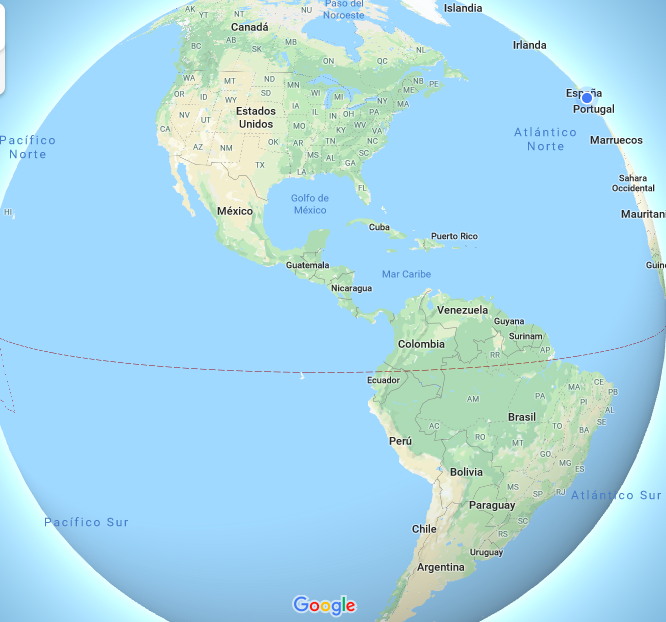

In [41]:
# Ahora a cada elemento de esta lista le tengo que asignar el océano/mar correspondiente. Lo puedo hacer a través de
# un diccionario

from IPython.display import Image

# Me gusta más esta pero no aparecen los mares: Image("oceans.gif")  

Image("oceans_america.png")

In [42]:
# Este es el listado de océanos/mares que bordean América

oceans = ["NORTH_ATLANTIC", "SOUTH_ATLANTIC", "NORTH_PACIFIC", "SOUTH_PACIFIC", "GULF_OF_MEXICO", "CARIBBEAN_SEA"]

In [43]:
# Y esta es la lista de países que tengo en mis registros

america_countries_coast = []

for Country in dataset:
    for c in dataset["Country"]:
        america_countries_coast.append(c)
    
tup_countries_coast = set(america_countries_coast)

print(len(tup_countries_coast))
print(tup_countries_coast)

43
{'ARGENTINA', 'DOMINICAN_REPUBLIC', 'CANADA', 'CURACAO', 'VENEZUELA', 'ANTIGUA', 'MEXICO_GM', 'MARTINIQUE', 'ECUADOR', 'BAHAMAS', 'PUERTO_RICO', 'BARBADOS', 'SAN_DOMINGO', 'PANAMA_C', 'GRENADA', 'USA_NP', 'COSTA_RICA_NP', 'TURKS_CAICOS', 'USA_NA', 'USA_GM', 'BERMUDA', 'USA_C', 'TRINIDAD_TOBAGO', 'HONDURAS', 'COLUMBIA_C', 'JOHNSTON_ISLAND', 'CARIBBEAN_SEA', 'FALKLAND_ISLANDS', 'EL_SALVADOR', 'BRAZIL', 'MEXICO_C', 'CHILE', 'JAMAICA', 'CAYMAN_ISLANDS', 'ST_MARTIN', 'CUBA', 'URUGUAY', 'COSTA_RICA_C', 'NICARAGUA', 'PANAMA_NP', 'MEXICO_NP', 'HAITI', 'GUYANA'}


In [44]:
# Creo un diccionario en el que asigno un océano a cada país

Ocean_country = {'USA_C': "CARIBBEAN_SEA", 'CHILE': "SOUTH_PACIFIC", 'ECUADOR': "SOUTH_PACIFIC", 
                 'EL_SALVADOR': "NORTH_PACIFIC", 'COSTA_RICA_NP': "NORTH_PACIFIC", 'PANAMA_C': "CARIBBEAN_SEA", 
                 'URUGUAY': "SOUTH_ATLANTIC", 'ANTIGUA': "CARIBBEAN_SEA", 'COLUMBIA_C': "CARIBBEAN_SEA", 
                 'JOHNSTON_ISLAND': "NORTH_PACIFIC", 'VENEZUELA': "CARIBBEAN_SEA", 'BARBADOS': "CARIBBEAN_SEA", 
                 'COSTA_RICA_C': "CARIBBEAN_SEA", 'HAITI': "CARIBBEAN_SEA", 'MEXICO_GM': "GULF_OF_MEXICO", 
                 'JAMAICA': "CARIBBEAN_SEA", 'CARIBBEAN_SEA': "CARIBBEAN_SEA", 'BERMUDA':"NORTH_ATLANTIC", 
                 'PUERTO_RICO': "CARIBBEAN_SEA", 'ARGENTINA': "SOUTH_ATLANTIC", 
                 'MEXICO_NP': "NORTH_PACIFIC", 'BAHAMAS':"NORTH_ATLANTIC", 'CAYMAN_ISLANDS': "CARIBBEAN_SEA", 
                 'USA_NA':"NORTH_ATLANTIC", 'USA_NP': "NORTH_PACIFIC", 'CUBA': "CARIBBEAN_SEA", 
                 'PANAMA_NP': "NORTH_PACIFIC", 'GUYANA': "CARIBBEAN_SEA", 'MEXICO_C': "CARIBBEAN_SEA", 
                 'HONDURAS': "CARIBBEAN_SEA", 'MARTINIQUE': "CARIBBEAN_SEA", 'FALKLAND_ISLANDS': "SOUTH_PACIFIC", 
                 'CANADA':"NORTH_ATLANTIC", 'USA_GM': "GULF_OF_MEXICO", 'TURKS_CAICOS': "CARIBBEAN_SEA", 
                 'TRINIDAD_TOBAGO': "CARIBBEAN_SEA", 'GRENADA': "CARIBBEAN_SEA", 'CURACAO': "CARIBBEAN_SEA", 
                 'BRAZIL': "SOUTH_ATLANTIC", 'ST_MARTIN': "CARIBBEAN_SEA", 'NICARAGUA': "NORTH_PACIFIC", 
                 'SAN_DOMINGO': "CARIBBEAN_SEA", 'DOMINICAN_REPUBLIC': "CARIBBEAN_SEA"}

len(Ocean_country)

43

In [45]:
# Creo la columna Ocean_Sea, a partir de mi diccionario

dataset["Ocean_Sea"] = dataset["Country"].map(Ocean_country)

In [46]:
display(dataset.head())

,Year,Country,original order,Ocean_Sea
0,2016,USA_NA,5993,NORTH_ATLANTIC
1,2016,USA_NA,5992,NORTH_ATLANTIC
2,2016,USA_NA,5991,NORTH_ATLANTIC
6,2016,USA_NA,5987,NORTH_ATLANTIC
7,2016,USA_NP,5986,NORTH_PACIFIC


In [47]:
# Ya no me hace falta la columna Country

dataset = dataset.drop("Country", axis = 1)

In [48]:
display(dataset.head())

,Year,original order,Ocean_Sea
0,2016,5993,NORTH_ATLANTIC
1,2016,5992,NORTH_ATLANTIC
2,2016,5991,NORTH_ATLANTIC
6,2016,5987,NORTH_ATLANTIC
7,2016,5986,NORTH_PACIFIC


In [49]:
# Ahora me deshago de los duplicados:

before = len(dataset)
dataset = dataset.drop_duplicates()
after = len(dataset)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  0


In [50]:
# Parece que los 4 registros repetidos en original order ya me los he quitado al deshacerme de otros registros.
# Por lo tanto, no tenía duplicados.

# Ya me puedo deshacer también de la columna original order

dataset = dataset.drop("original order", axis = 1)

In [51]:
display(dataset.head())

,Year,Ocean_Sea
0,2016,NORTH_ATLANTIC
1,2016,NORTH_ATLANTIC
2,2016,NORTH_ATLANTIC
6,2016,NORTH_ATLANTIC
7,2016,NORTH_PACIFIC


In [52]:
# A partir de aquí, voy a querer:
# 1. Un histogram (Incidents_per_Ocean) con el número de ataques según el océano, a lo largo de la historia
# 2. Un line graph (Evolution_attacks_history) para la evolución de cada océano a lo largo de la historia.

In [53]:
# Primero voy a por el histogram

dataset["Ocean_Sea"].value_counts()

NORTH_ATLANTIC    1496
NORTH_PACIFIC      642
CARIBBEAN_SEA      165
GULF_OF_MEXICO     138
SOUTH_ATLANTIC     104
SOUTH_PACIFIC       17
Name: Ocean_Sea, dtype: int64

In [54]:
# dataset['Number_of_Incidents'] = dataset.groupby(['Ocean_Sea'])['Year'].transform('count')

In [55]:
# display(dataset.head())

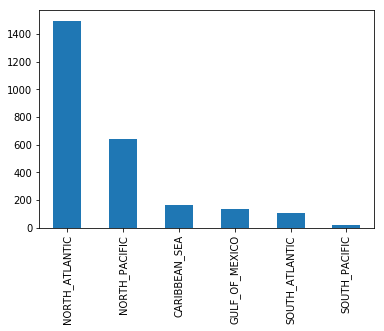

In [56]:
dataset['Ocean_Sea'].value_counts().plot.bar()

In [59]:
# Asigno mi dataset resultado a una variable, para exportar el CSV

oceans_america_sharks = dataset

display(oceans_america_sharks.head())

,Year,Ocean_Sea
0,2016,NORTH_ATLANTIC
1,2016,NORTH_ATLANTIC
2,2016,NORTH_ATLANTIC
6,2016,NORTH_ATLANTIC
7,2016,NORTH_PACIFIC


In [60]:
# Lo exporto

oceans_america_sharks.to_csv("oceans_america_sharks.csv")

In [326]:
# A PARTIR DE AQUÍ HE INTENTADO HACER LINE GRAPHS PARA LA EVOLUCIÓN EN CADA OCÉANO, Y HE FRACASADO.
# Creo que es porque los registros no están bien ordenados con año creciente, pero he intentado ordenarlos con 
# sort_values(), y no ha funcionado.

dataset_NA = dataset[dataset.Ocean_Sea == "NORTH_ATLANTIC"]
dataset_NA = dataset_NA.sort_values("Year")

dataset_NP = dataset[dataset.Ocean_Sea == "NORTH_PACIFIC"]
dataset_NP = dataset_NP.sort_values("Year")

dataset_C = dataset[dataset.Ocean_Sea == "CARIBBEAN_SEA"]
dataset_C = dataset_C.sort_values("Year")

dataset_GM = dataset[dataset.Ocean_Sea == "GULF_OF_MEXICO"]
dataset_GM = dataset_GM.sort_values("Year")

dataset_SA = dataset[dataset.Ocean_Sea == "SOUTH_ATLANTIC"]
dataset_SA = dataset_SA.sort_values("Year")

dataset_SP = dataset[dataset.Ocean_Sea == "SOUTH_PACIFIC"]
dataset_SP = dataset_SP.sort_values("Year")

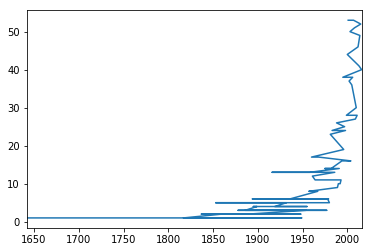

In [327]:
# NORTH ATLANTIC

dataset_NA['Year'].value_counts().plot.line()

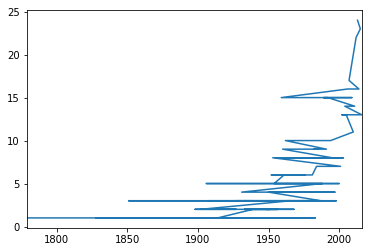

In [328]:
# NORTH PACIFIC

dataset_NP['Year'].value_counts().plot.line()

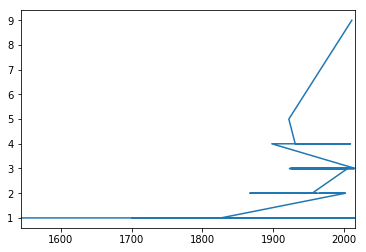

In [329]:
# CARIBBEAN SEA

dataset_C['Year'].value_counts().plot.line()

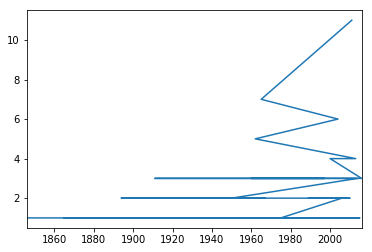

In [330]:
# GULF OF MEXICO

dataset_GM['Year'].value_counts().plot.line()

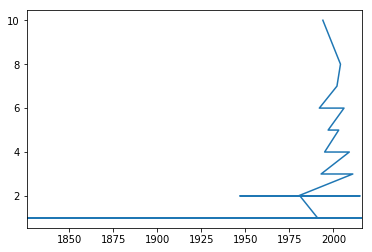

In [331]:
# SOUTH ATLANTIC

dataset_SA['Year'].value_counts().plot.line()

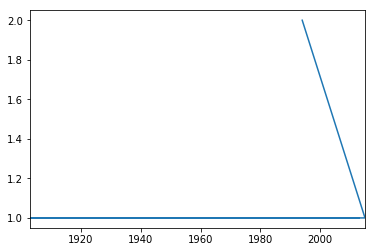

In [332]:
# SOUTH PACIFIC

dataset_SP['Year'].value_counts().plot.line()